In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.figure import figaspect

In [44]:
pref = "../../../../Korea/spin-polarized/"
#pref = ""
path1 = pref + "WSe/projwfc/"
path2 = pref + "VSe/projwfc/"
path3 = pref + "Sevac/projwfc/"
path4 = pref + "Wvac/projwfc/"

def plot_LDOS(path, spin, updown):

    #Fermi energies (no spin pol)
    # F1 = -0.0447
    # F2 = -0.0526
    # F3 = -0.0818
    # F4 = 0.3187
    #Fermi energies (spin pol)
    F2 = 0.0379



    s = ['E', 'LDOS','PDOS']
    p = ['E', 'LDOS','PDOS1','PDOS2','PDOS3']
    d = ['E', 'LDOS','PDOS1','PDOS2','PDOS3','PDOS4','PDOS5']
    s1up = ['E', 'LDOSup', 'LDOSdw','PDOS1','PDOS2']
    p1up = ['E', 'LDOSup', 'LDOSdw','PDOS1','PDOS2','PDOS3','PDOS4','PDOS5','PDOS6']
    d1up = ['E', 'LDOSup', 'LDOSdw','PDOS1','PDOS2','PDOS3','PDOS4','PDOS5','PDOS6','PDOS7','PDOS8','PDOS9','PDOS10']

    if spin:
        s1, p1, d1 = s1up, p1up, d1up
        sp = updown
    else:
        s1, p1, d1 = s, p, d
        sp = ''

    def load_V(num, path):

        dfs1 = pd.read_csv(path + "v.pdos_atm#" + str(num) + "(V)_wfc#1(s)",sep="  ", comment='#', names = s1)
        dfs2 = pd.read_csv(path + "v.pdos_atm#" + str(num) + "(V)_wfc#2(s)",sep="  ", comment='#', names = s1)
        dfp = pd.read_csv(path + "v.pdos_atm#" + str(num) + "(V)_wfc#3(p)",sep="  ", comment='#', names = p1)
        dfd = pd.read_csv(path + "v.pdos_atm#" + str(num) + "(V)_wfc#4(d)",sep="  ", comment='#', names = d1)
        df = pd.DataFrame()
        df['E'] = dfs1['E']
        df['s1'] = dfs1.filter(regex='LDOS'+sp)
        df['s2'] = dfs2.filter(regex='LDOS'+sp)
        df['p'] = dfp.filter(regex='LDOS'+sp)
        df['d'] = dfd.filter(regex='LDOS'+sp)
        df['LDOS'] = df.s1 + df.s2 +df.p + df.d
        return df

    def load_W(num, path):

        dfs1 = pd.read_csv(path + "v.pdos_atm#" + str(num) + "(W)_wfc#1(s)",sep="  ", comment='#', names = s1)
        dfs2 = pd.read_csv(path + "v.pdos_atm#" + str(num) + "(W)_wfc#2(s)",sep="  ", comment='#', names = s1)
        dfp1 = pd.read_csv(path + "v.pdos_atm#" + str(num) + "(W)_wfc#3(p)",sep="  ", comment='#', names = p1)
        dfp2 = pd.read_csv(path + "v.pdos_atm#" + str(num) + "(W)_wfc#4(p)",sep="  ", comment='#', names = p1)
        dfd = pd.read_csv(path + "v.pdos_atm#" + str(num) + "(W)_wfc#5(d)",sep="  ", comment='#', names = d1)
        df = pd.DataFrame()
        df['E'] = dfs1['E']
        df['s1'] = dfs1.filter(regex='LDOS'+sp)
        df['s2'] = dfs2.filter(regex='LDOS'+sp)
        df['p1'] = dfp1.filter(regex='LDOS'+sp)
        df['p2'] = dfp1.filter(regex='LDOS'+sp)
        df['d'] = dfd.filter(regex='LDOS'+sp)
        df['LDOS'] = df.s1 + df.s2 +df.p1 + df.p2 + df.d
        return df

    def load_Se(num, path):

        dfs1 = pd.read_csv(path + "v.pdos_atm#" + str(num) + "(Se)_wfc#1(s)",sep="  ", comment='#', names = s1)
        dfp = pd.read_csv(path + "v.pdos_atm#" + str(num) + "(Se)_wfc#2(p)",sep="  ", comment='#', names = p1)
        df = pd.DataFrame()
        df['E'] = dfs1['E']
        df['s1'] = dfs1.filter(regex='LDOS'+sp)
        df['p'] = dfp.filter(regex='LDOS'+sp)
        df['LDOS'] = df.s1 +df.p
        return df
    
    dfdict = {}
    #WSe
    if pth == path1:
        Fermi = F1
        dfdict['Se1'] = load_Se(57,pth)
        dfdict['Se2'] = load_Se(79,pth)
        dfdict['W1'] = load_W(9, pth)
        dfdict['W2'] = load_W(16, pth)
        dfdict['V'] = load_V(10, pth)
    #VSe
    elif pth == path2:
        Fermi = F2
        dfdict['Se1'] = load_Se(53,pth)
        dfdict['Se2'] = load_Se(77,pth)
        dfdict['W1'] = load_W(9, pth)
        dfdict['W2'] = load_W(15, pth)
        dfdict['V'] = load_V(10, pth)
    #Sevac
    elif pth == path3:
        Fermi = F3
        dfdict['Se1'] = load_Se(57,pth)
        dfdict['Se2'] = load_Se(70,pth)
        dfdict['W1'] = load_W(9, pth)
        dfdict['W2'] = load_W(22, pth)
        dfdict['V'] = load_V(10, pth)
    #Wvac
    elif pth == path4:
        Fermi = F4
        dfdict['Se1'] = load_Se(57,pth)
        dfdict['Se2'] = load_Se(77,pth)
        dfdict['W1'] = load_W(1, pth)
        dfdict['W2'] = load_W(13, pth)
        
    return dfdict


c:\users\kory\appdata\local\conda\conda\envs\py3\lib\site-packages\ipykernel_launcher.py:68: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
c:\users\kory\appdata\local\conda\conda\envs\py3\lib\site-packages\ipykernel_launcher.py:69: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
c:\users\kory\appdata\local\conda\conda\envs\py3\lib\site-packages\ipykernel_launcher.py:51: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
c:\u

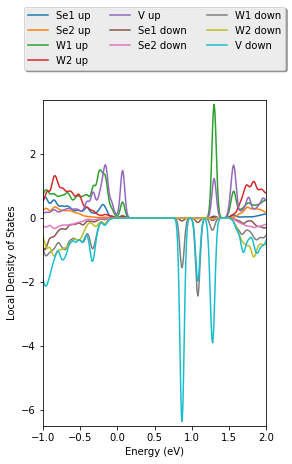

In [80]:
pth = path2

df1 = plot_LDOS(pth, True, 'dw')
df2 = plot_LDOS(pth, True, 'up')


w, h = figaspect(1.5)
fig, ax = plt.subplots(figsize=(w,h))

for key in df1:
    plt.plot(df1[key].E-Fermi, df1[key].LDOS, label=key+' up')
for key in df2:
    plt.plot(df2[key].E-Fermi, -df2[key].LDOS, label=key+' down')

    
    
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3),
          ncol=3, fancybox=True, shadow=True)
plt.xlim(-1,2)
#plt.ylim(0,4)
plt.ylim(-6.5,3.7)
plt.xlabel("Energy (eV)")
plt.ylabel("Local Density of States")

plt.show()




c:\users\kory\appdata\local\conda\conda\envs\py3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


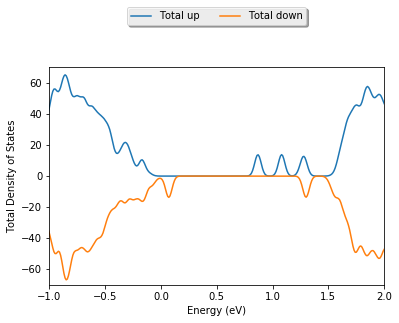

In [74]:
totdos = pd.read_csv(pth + "v.pdos_tot",sep="  ", comment='#', names = ['E', 'LDOSup', 'LDOSdw','PDOS1', 'PDOS2'])
plt.plot(totdos.E-Fermi, totdos.LDOSup, label='Total up')
plt.plot(totdos.E-Fermi, -totdos.LDOSdw, label='Total down')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3),
          ncol=3, fancybox=True, shadow=True)
plt.xlim(-1,2)
plt.ylim(-70,70)
plt.xlabel("Energy (eV)")
plt.ylabel("Total Density of States")

plt.show()
